In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import string
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import gzip
import csv
import matplotlib
import matplotlib.pyplot as plt


DATA_DIR="./data/data"

In [2]:
def add(r, names, df) :
    for m in names:
        r[m].append(df[m].mean())

def tonp (r, names):
    for m in names:
        r[m] = np.array(r[m])
    
def readResults(n, shortname, name):
    m_names = ['metric', 'match', 'distance', 'numf', 'diff']
    prefix = DATA_DIR + "/results/" + shortname + str(n) + "/result_" + name
    suffix = "_" + str(n) + "_10.csv.gz"
    r = {'metric':[], 'match' : [], 'distance' : [], 'numf' : [], 'diff' : [] }
    for i in range(1, 7) :
        fullName = prefix + str(i) + suffix
        df = pd.read_csv(fullName, compression='gzip')#.drop(['Unnamed: 0'],axis=1)
        add(r, m_names, df)
    tonp(r, m_names)
    return r   



In [3]:
t2 = readResults(2, "t", "train")
t10 = readResults(10, "t", "train")
t50 = readResults(50, "t", "train")
t100 = readResults(100, "t", "train")
t2r = [t2['metric'].mean()-t2['metric'].std(), t2['metric'].mean()+t2['metric'].std()]
t10r = [t10['metric'].mean()-t10['metric'].std(), t10['metric'].mean()+t10['metric'].std()]
t50r = [t50['metric'].mean()-t50['metric'].std(), t50['metric'].mean()+t50['metric'].std()]
t100r = [t100['metric'].mean()-t100['metric'].std(), t100['metric'].mean()+t100['metric'].std()]
print("Training results:")
print(t2r, t10r, t50r, t100r )

Training results:
[22.559941287104824, 60.43343601352909] [23.629141784151592, 61.56951317075292] [24.382024798264013, 62.67848031675777] [23.68400933587961, 63.252753765807626]


In [4]:
v2 = readResults(2, "v", "validate")
v10 = readResults(10, "v", "validate")
v50 = readResults(50, "v", "validate")
v100 = readResults(100, "v", "validate")
print("Validation results:")
v2r = [v2['metric'].mean()-v2['metric'].std(), v2['metric'].mean()+v2['metric'].std()]
v10r = [v10['metric'].mean()-v10['metric'].std(), v10['metric'].mean()+v10['metric'].std()]
v50r = [v50['metric'].mean()-v50['metric'].std(), v50['metric'].mean()+v50['metric'].std()]
v100r = [v100['metric'].mean()-v100['metric'].std(), v100['metric'].mean()+v100['metric'].std()]
print(v2r, v10r, v50r, v100r )

Validation results:
[28.827183695116958, 35.21136558654682] [29.29182859323712, 36.10683459876201] [29.500780161515227, 36.3634961046068] [29.751302538182006, 36.22031157886555]


In [5]:
test2 = readResults(2, "test", "test")
test10 = readResults(10, "test", "test")
test2r = [test2['metric'].mean()-test2['metric'].std(), test2['metric'].mean()+test2['metric'].std()]
test10r = [test10['metric'].mean()-test10['metric'].std(), test10['metric'].mean()+test10['metric'].std()]
print("Testing results:")
print(test2r, test10r)

Testing results:
[29.997810917935777, 47.666304013662426] [29.40096806196165, 46.46003394370575]


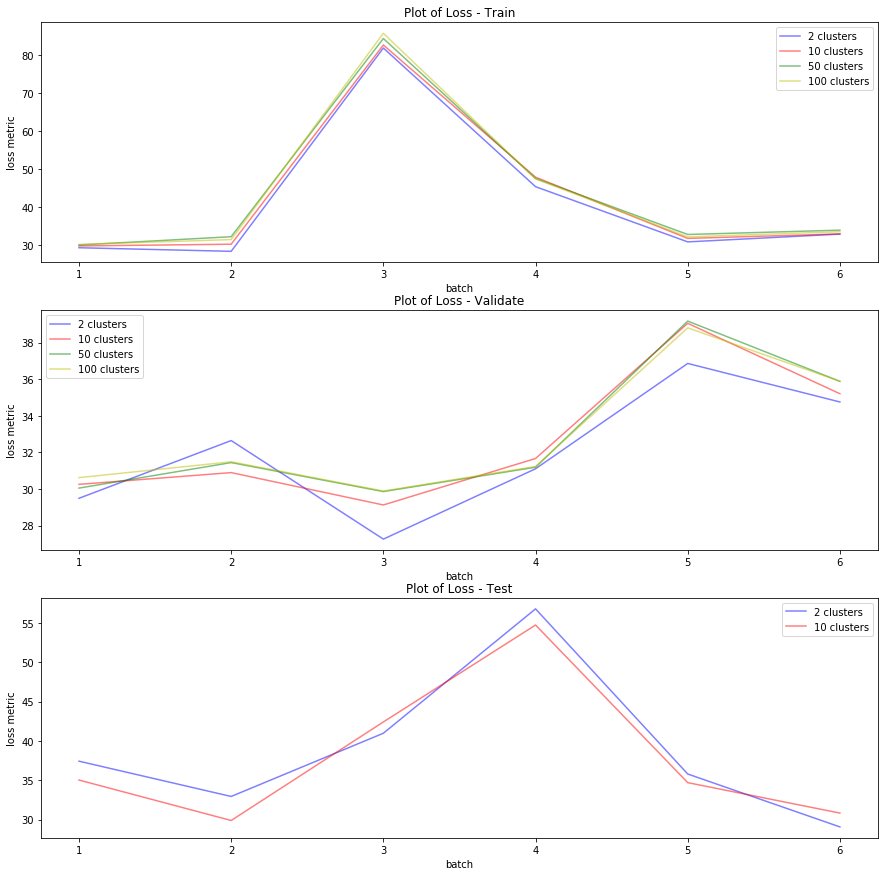

In [6]:
x = range(1, 7)
fig, axes = plt.subplots(3,1,figsize=(15,15))
axes = axes.ravel()
axes[0].set_title('Plot of Loss - Train')
axes[0].plot(x, t2['metric'], alpha=0.5, color='b', label='2 clusters')
axes[0].plot(x, t10['metric'], alpha=0.5, color='r', label='10 clusters')
axes[0].plot(x, t50['metric'], alpha=0.5, color='g', label='50 clusters')
axes[0].plot(x, t100['metric'], alpha=0.5, color='y', label='100 clusters')
axes[0].set_xlabel('batch')
axes[0].set_ylabel('loss metric')
axes[0].legend()
axes[1].set_title('Plot of Loss - Validate')
axes[1].plot(x, v2['metric'], alpha=0.5, color='b', label='2 clusters')
axes[1].plot(x, v10['metric'], alpha=0.5, color='r', label='10 clusters')
axes[1].plot(x, v50['metric'], alpha=0.5, color='g', label='50 clusters')
axes[1].plot(x, v100['metric'], alpha=0.5, color='y', label='100 clusters')
axes[1].set_xlabel('batch')
axes[1].set_ylabel('loss metric')
axes[1].legend()
axes[2].set_title('Plot of Loss - Test')
axes[2].plot(x, test2['metric'], alpha=0.5, color='b', label='2 clusters')
axes[2].plot(x, test10['metric'], alpha=0.5, color='r', label='10 clusters')
axes[2].set_xlabel('batch')
axes[2].set_ylabel('loss metric')
axes[2].legend()
plt.show()